# Julian Sarmiento 20231678027- Miller Barahona 20231678032
## Conjunto de datos
### Milk Quality Prediction
This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

REF. https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data

# Analisis Exploratorio
## Problema

### Predecir la calidad de la leche segun sus caracteristicas

Determinar qué factores (como la acidez, densidad, conductividad, etc.) tienen mayor impacto en la clasificación de la leche

### Preguntas

+ ¿Cuáles son las variables más correlacionadas con la calidad de la leche?
+ ¿La combinación de varias características mejora la precisión en la clasificación de la calidad de la leche?
+ ¿Qué variables presentan mayores variaciones en las muestras de diferentes calidades?
+ ¿La relación entre las variables y la calidad de la leche es lineal o no lineal?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Cargar los datos
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


### Basic info of data set

In [3]:
df.shape

(1059, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
pd.DataFrame(df.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [7]:
df.duplicated().sum()

np.int64(976)

In [8]:
df["Grade"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [9]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [10]:
columns = df.columns

In [11]:
def plot_boxplot(column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Grade', y=column, data=df)
    plt.title(f'Distribución de {column} según la Calidad de la Leche')
    plt.show()

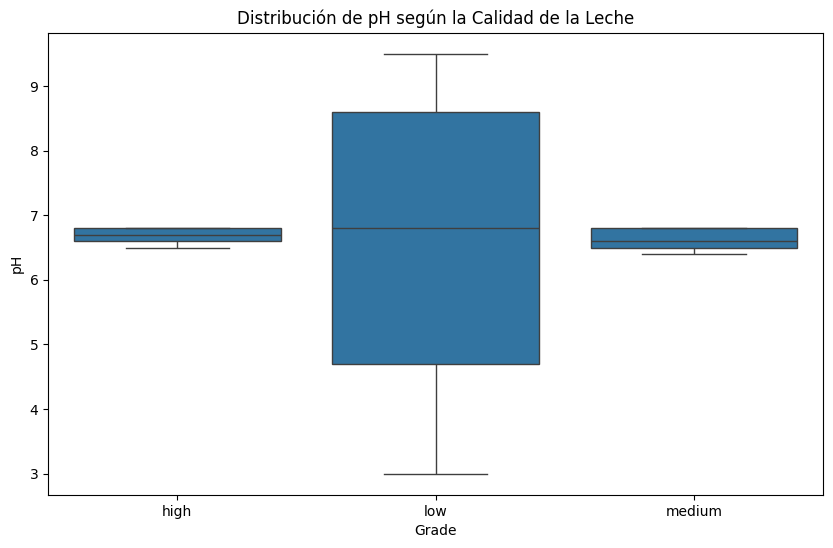

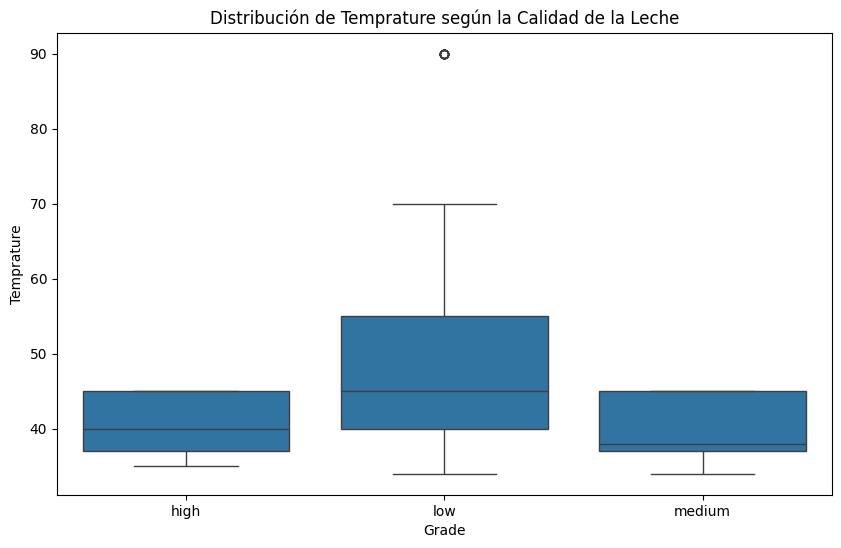

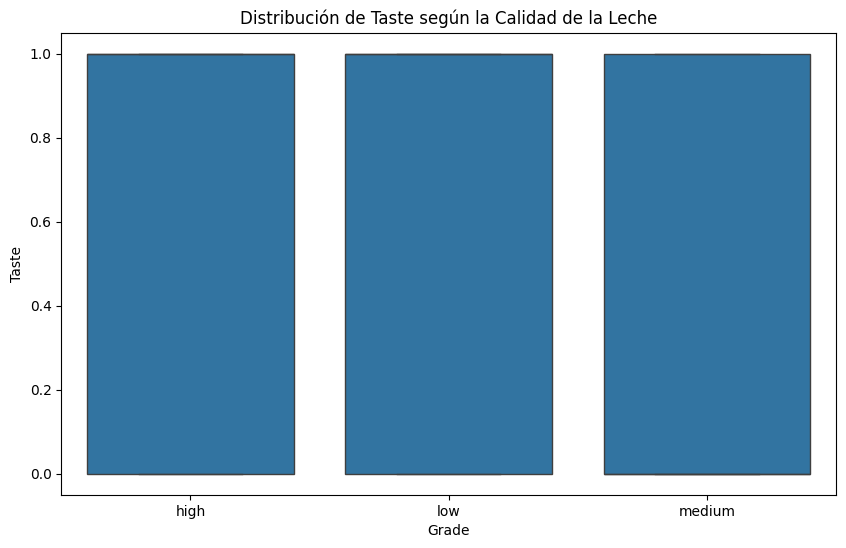

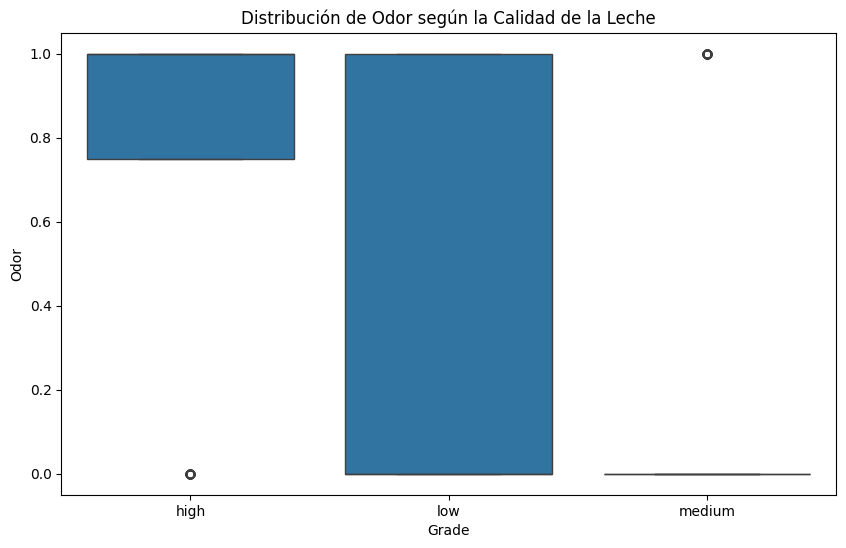

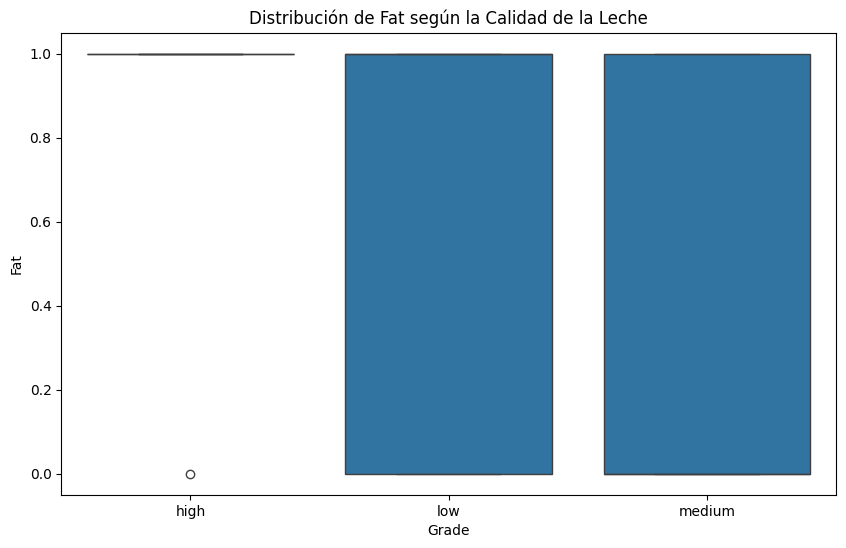

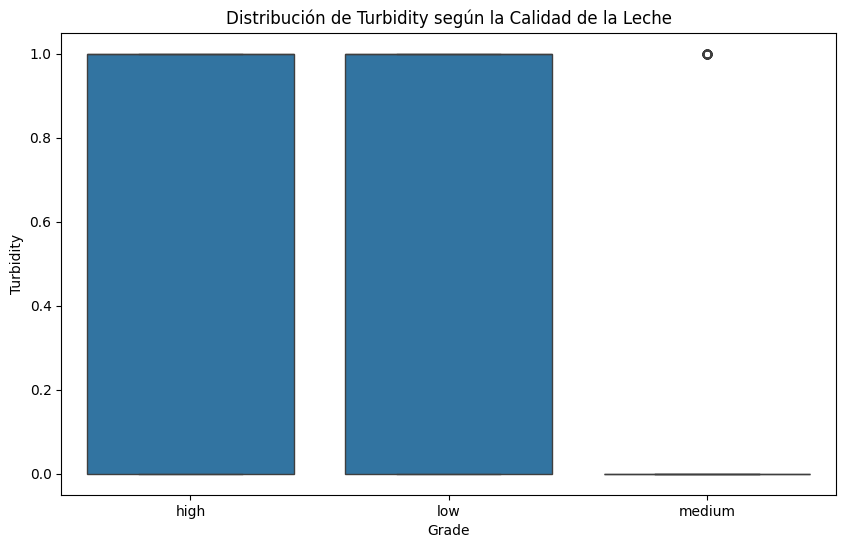

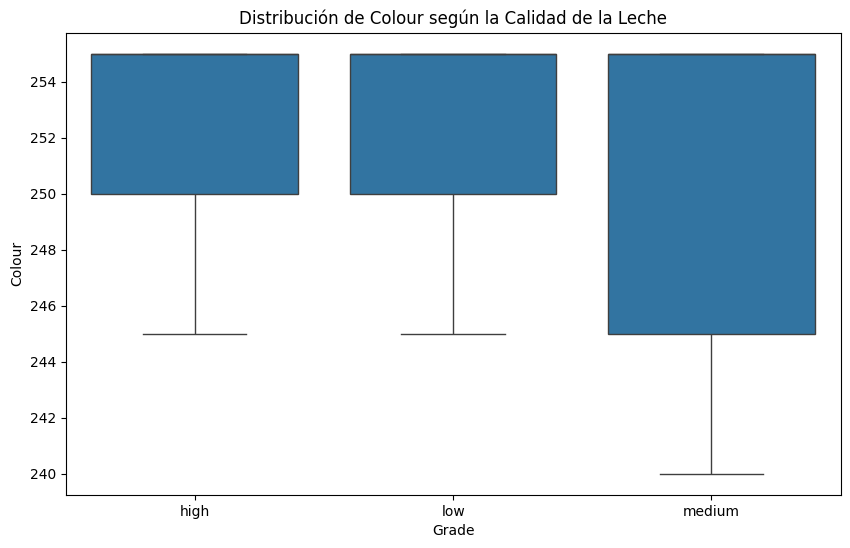

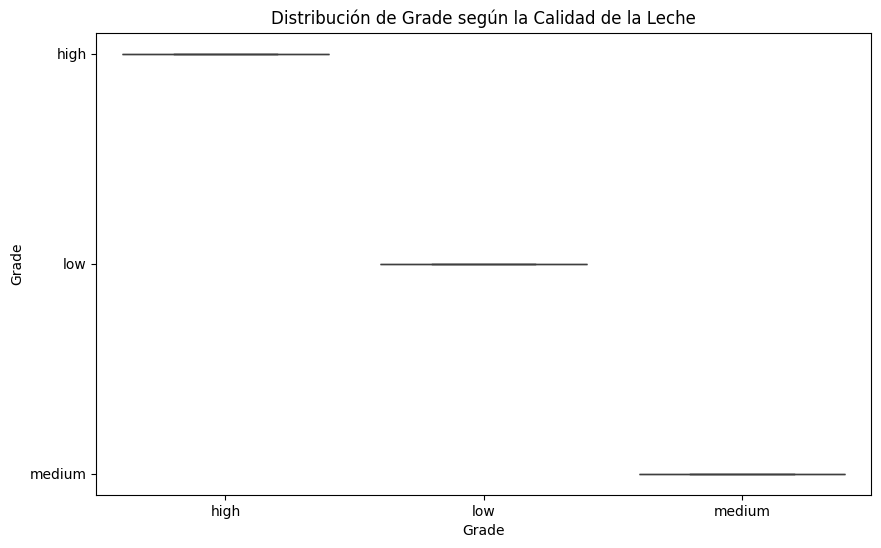

In [12]:
for col in columns:
    plot_boxplot(col)

# Correlation

In [13]:
grade_mapping = {
    'high': 2,
    'medium': 1,
    'low': 0
}

df['Grade_numeric'] = df['Grade'].map(grade_mapping)

df_corr = df.drop(columns=['Grade']).corr()

df_corr

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_numeric
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade_numeric,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


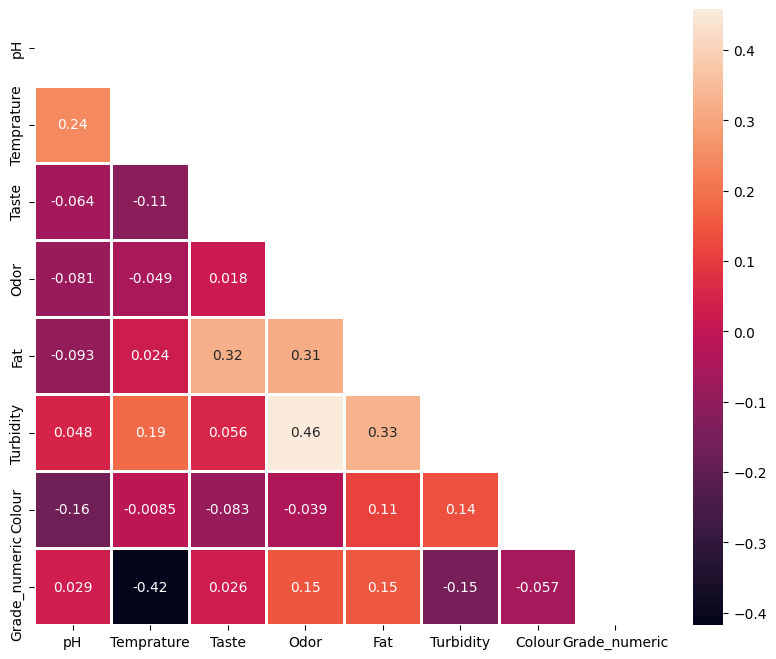

In [14]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

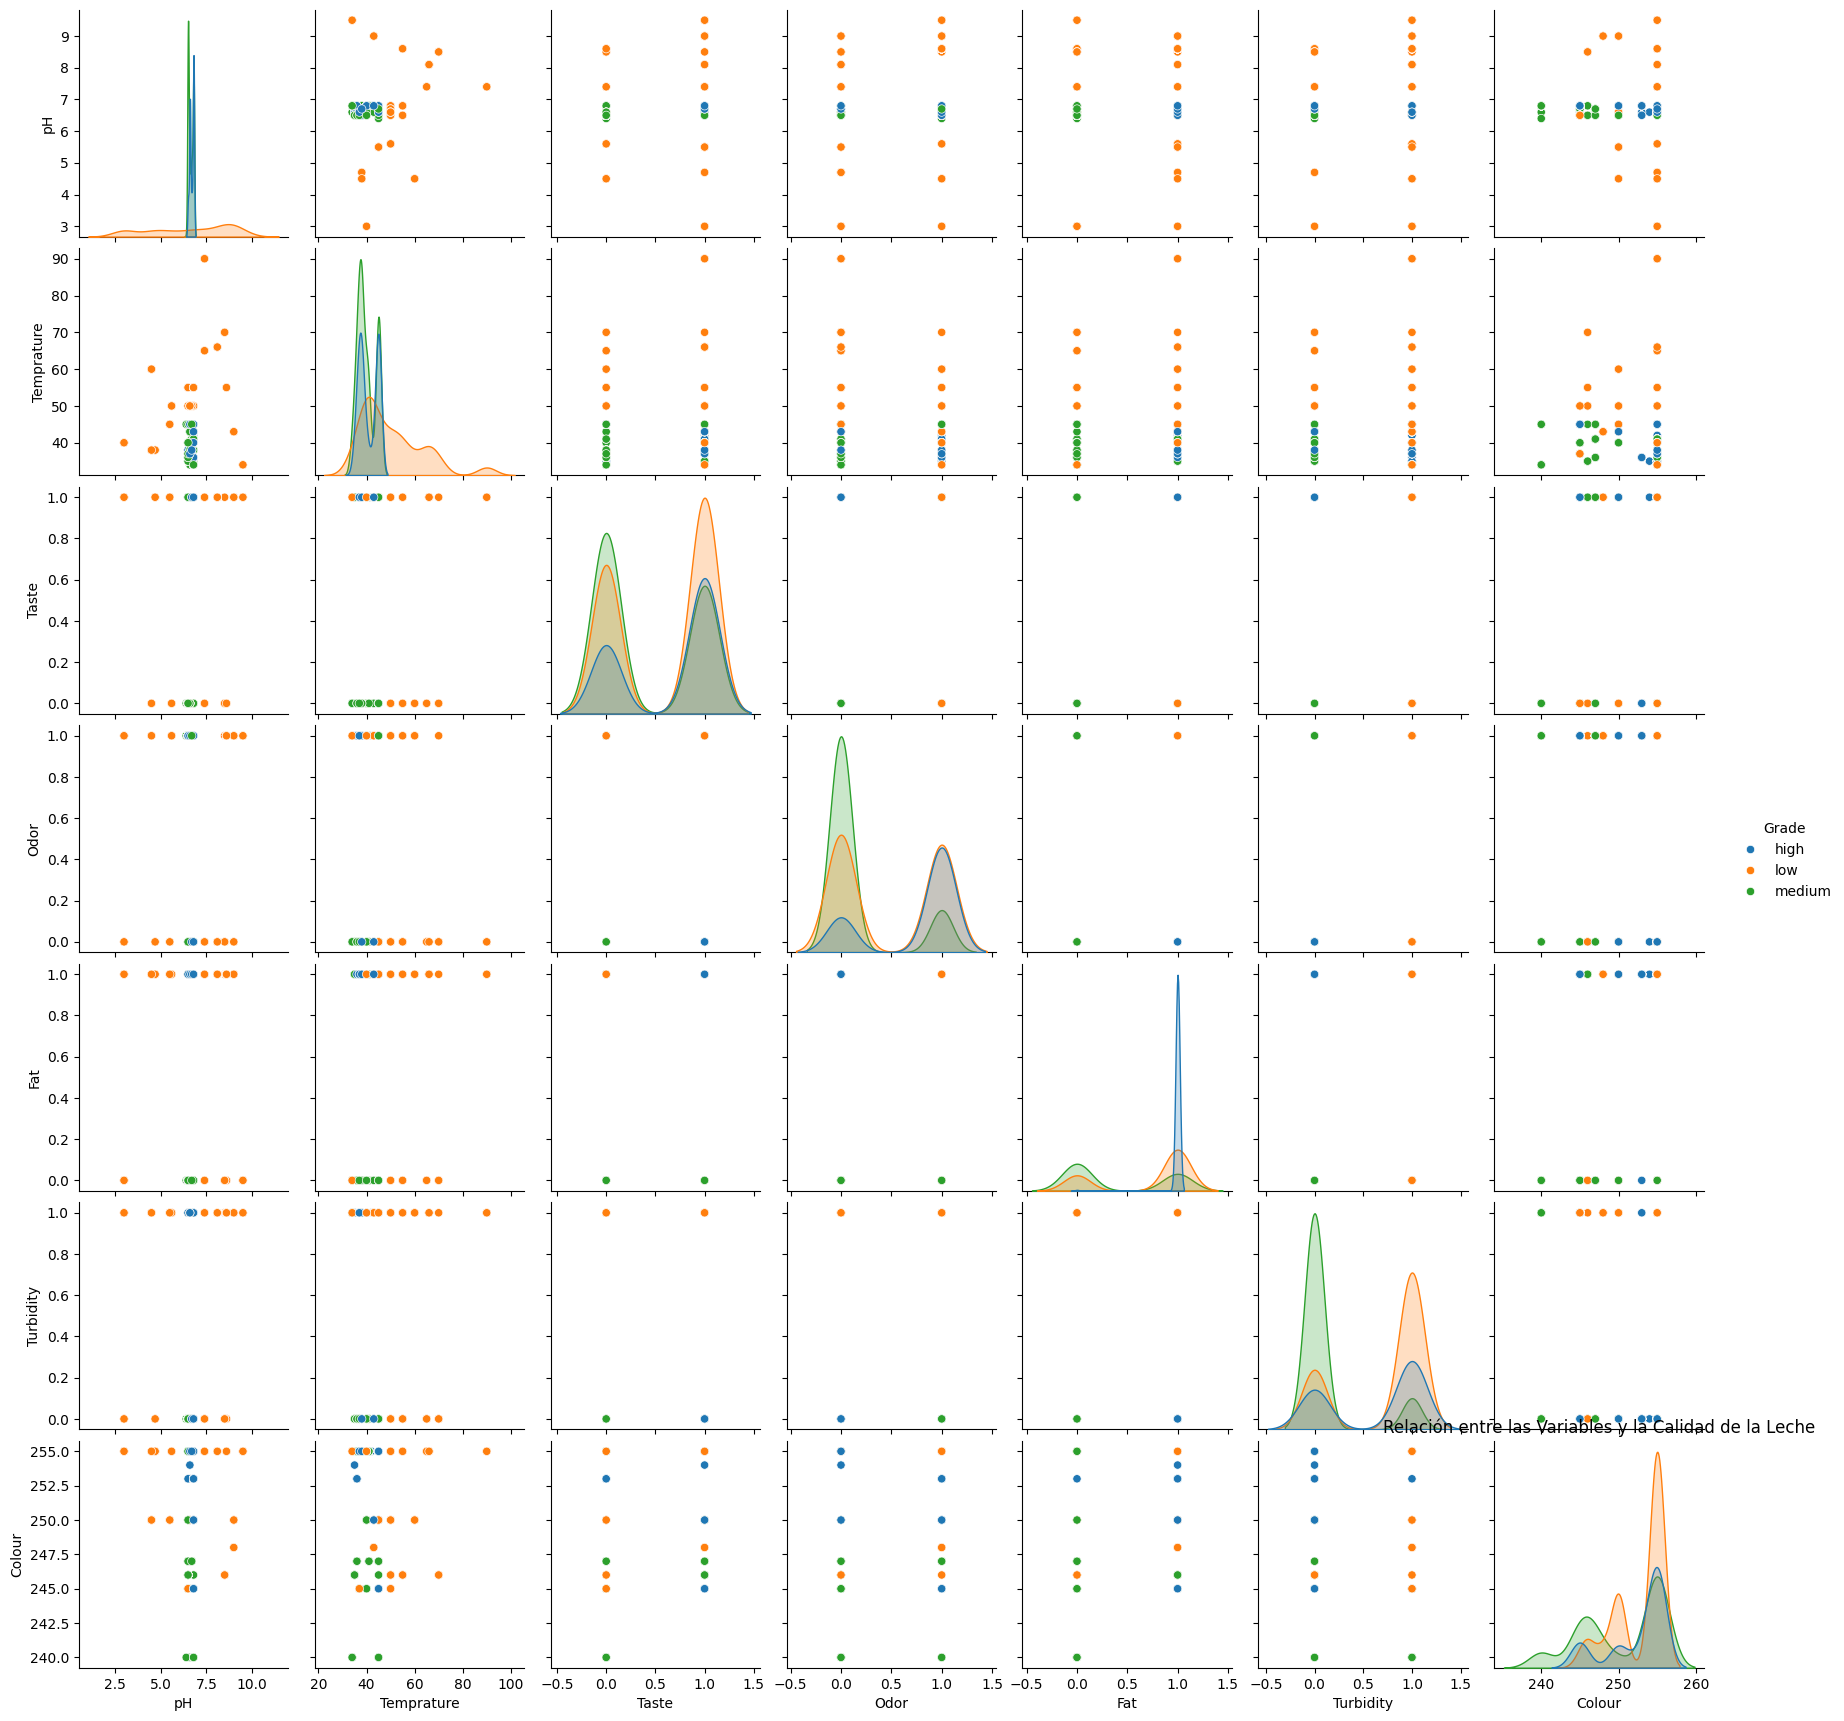

In [15]:
df_filtered = df.drop(columns=['Grade_numeric'])
sns.pairplot(df_filtered, hue='Grade', diag_kind='kde')
plt.title('Relación entre las Variables y la Calidad de la Leche')
plt.show()

In [16]:
unique_grades = df[['Grade', 'Grade_numeric']].drop_duplicates()

print(unique_grades)



    Grade  Grade_numeric
0    high              2
2     low              0
4  medium              1


In [17]:
def scatter_3d (x, y, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, df['Grade_numeric'], c=df['Grade_numeric'], cmap='viridis')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel('Calidad')

    plt.title(f'Relación entre {xlabel}, {ylabel} y Calidad de la Leche')
    plt.show()


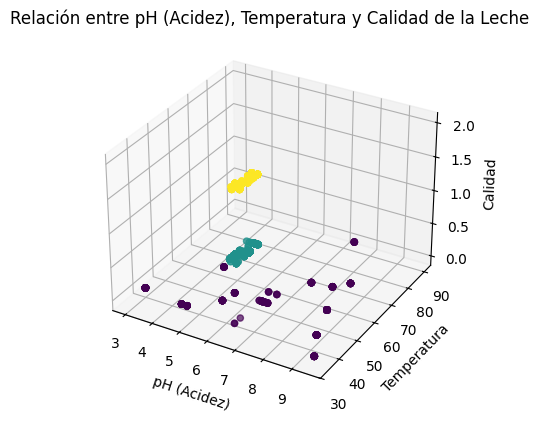

In [18]:

scatter_3d(df['pH'], df['Temprature'], 'pH (Acidez)', 'Temperatura')

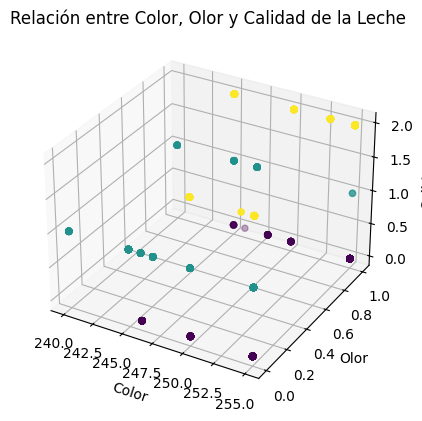

In [19]:
scatter_3d(df['Colour'], df['Odor'], 'Color', 'Olor')

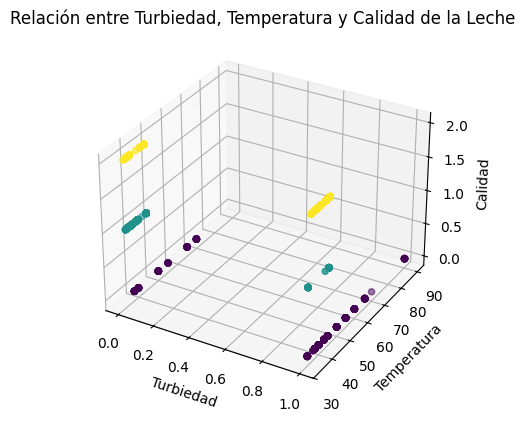

In [20]:
scatter_3d(df['Turbidity'], df['Temprature'], 'Turbiedad', 'Temperatura')

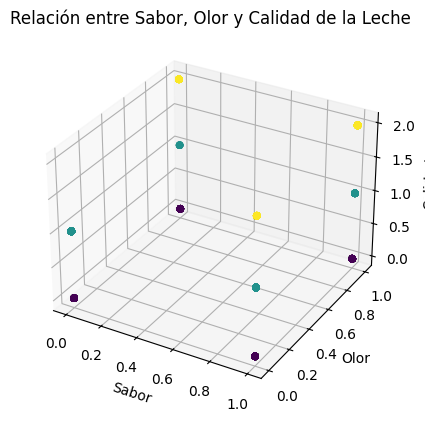

In [21]:
scatter_3d(df['Taste'], df['Odor'], 'Sabor', 'Olor')

# Model
+ Select the characteristics and the target variable
+ Exclude the columns 'Grade' and 'Grade_numeric'.
+ And it will be our target variable

In [22]:

X = df.drop(columns=['Grade', 'Grade_numeric'])  
y = df['Grade_numeric']

## Split data into training (70%) and test (30%) sets.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [25]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))

print('Informe de clasificación:')
print(classification_report(y_test, y_pred))


Exactitud del modelo: 0.85
Matriz de confusión:
[[101   3  11]
 [  7 106  14]
 [  9   3  64]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       115
           1       0.95      0.83      0.89       127
           2       0.72      0.84      0.78        76

    accuracy                           0.85       318
   macro avg       0.84      0.85      0.84       318
weighted avg       0.86      0.85      0.85       318



## Matriz de confusion

Herramienta útil para visualizar el rendimiento de un modelo de clasificación

Cada fila de la matriz representa las instancias reales de cada clase,  
mientras que cada columna representa las instancias predichas por el modelo

 $\begin{bmatrix} 101 & 3 & 11 \\ 7 & 106 & 14 \\ 9 & 3 & 64 \end{bmatrix}$ 


$
Fila\ 0 \longrightarrow Low
$

+ 101 casos Low fueron correctamente clasificados como Low
+ 3 casos Low fueron incorrectamente clasificados como Medium
+ 11 casos Low fueron incorrectamente clasificados como High

$
Fila\ 1 \longrightarrow Medium
$

+ 7 casos Medium fueron incorrectamente clasificados como Low
+ 106 casos Medium fueron correctamente clasificados como Medium
+ 14 casos Medium fueron incorrectamente clasificados como High

$
Fila\ 2 \longrightarrow High
$

+ 9 casos High fueron incorrectamente clasificados como Low
+ 3 casos High fueron incorrectamente clasificados como Medium
+ 64 casos High fueron correctamente clasificados como High


# Modelo solo con ph y temperatura 

In [26]:
X1 = df.drop(columns=['Grade', 'Grade_numeric', 'Turbidity', 'Taste', 'Odor', 'Fat', 'Colour'])  
Y1 = df['Grade_numeric']

In [27]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [28]:

model1 = LogisticRegression(max_iter=10000)

model1.fit(X1_train, Y1_train)

LogisticRegression(max_iter=10000)

In [29]:
Y1_pred = model1.predict(X1_test)

accuracy1 = accuracy_score(Y1_test, Y1_pred)
print(f'Exactitud del modelo: {accuracy1:.2f}')

print('Matriz de confusión:')
print(confusion_matrix(Y1_test, Y1_pred))

print('Informe de clasificación:')
print(classification_report(Y1_test, Y1_pred))

Exactitud del modelo: 0.52
Matriz de confusión:
[[79 36  0]
 [40 87  0]
 [33 43  0]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.69      0.59       115
           1       0.52      0.69      0.59       127
           2       0.00      0.00      0.00        76

    accuracy                           0.52       318
   macro avg       0.35      0.46      0.40       318
weighted avg       0.40      0.52      0.45       318



C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classific

# Conclusiones

+ ¿Cuáles son las variables más correlacionadas con la calidad de la leche?

    Rta: Las variables con más conrrelación son: el odor, fat, turbidity y temperature.
+ ¿La combinación de varias características mejora la precisión en la clasificación de la calidad de la leche?

    Rta: Si, como lo vimos anteriormente, se creó un modelo con solo el phy la temperatura en su entrenamiento y su resultado de clasificación fue de solo el 52% cuando con todas las caracteristicas, se obtuvo un 85% de clasificación 
+ ¿Qué variables presentan mayores variaciones en las muestras de diferentes calidades?

    Rta: Las variables con mayores variaciones son:
    + pH: Presenta la mayor varianza en las muestras de baja calidad.
    + Temperatura: También tiene una varianza alta en las muestras de baja calidad.
    + Color: La varianza es especialmente alta en las muestras de calidad media.